# Normalization of the count data with visualization via PCA and heatmaps

Normalization Method: TPM and log +1

Note: The heatmaps are interactable and won't load directly in Github. Open in VS Code.

Lade TPM-Daten für Brandao_MCCM_full_raw_counts_marked...
Lade TPM-Daten für Finstrlova_Newman_full_raw_counts_marked...
Lade TPM-Daten für Guegler_T4_minusToxIN_full_raw_counts_marked...
Lade TPM-Daten für Guegler_T7_plusToxIN_full_raw_counts_marked...
Lade TPM-Daten für Lood_full_raw_counts_marked...
Lade TPM-Daten für Sprenger_VC_WT_VP882_delta_cpdS_full_raw_counts_marked...
Lade TPM-Daten für Yang_full_raw_counts_marked...
Erzeuge PCA für Brandao_MCCM_full_raw_counts_marked...


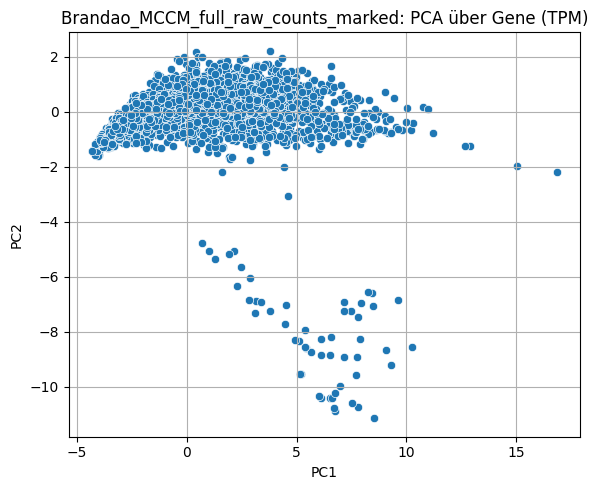

Erzeuge Heatmap für Brandao_MCCM_full_raw_counts_marked...


interactive(children=(IntSlider(value=20, continuous_update=False, description='Top % Gene:', layout=Layout(wi…

Erzeuge PCA für Finstrlova_Newman_full_raw_counts_marked...


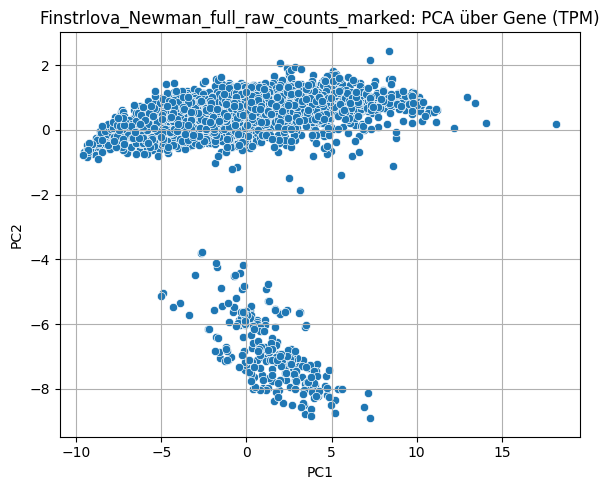

Erzeuge Heatmap für Finstrlova_Newman_full_raw_counts_marked...


interactive(children=(IntSlider(value=20, continuous_update=False, description='Top % Gene:', layout=Layout(wi…

Erzeuge PCA für Guegler_T4_minusToxIN_full_raw_counts_marked...


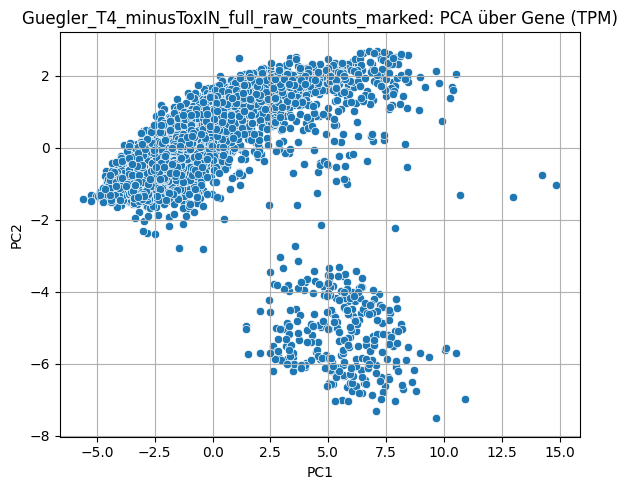

Erzeuge Heatmap für Guegler_T4_minusToxIN_full_raw_counts_marked...


interactive(children=(IntSlider(value=20, continuous_update=False, description='Top % Gene:', layout=Layout(wi…

Erzeuge PCA für Guegler_T7_plusToxIN_full_raw_counts_marked...


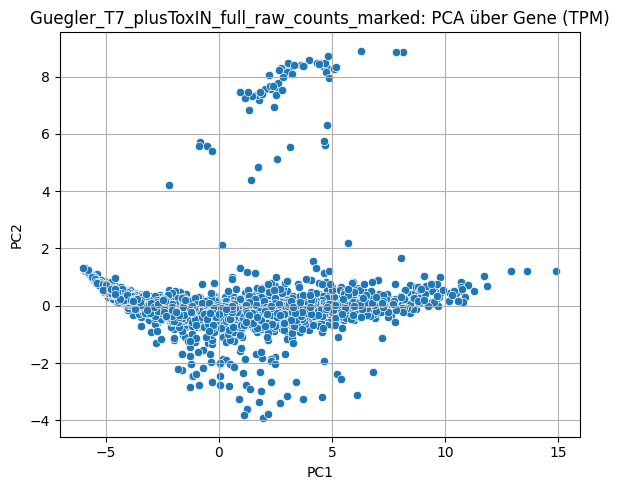

Erzeuge Heatmap für Guegler_T7_plusToxIN_full_raw_counts_marked...


interactive(children=(IntSlider(value=20, continuous_update=False, description='Top % Gene:', layout=Layout(wi…

Erzeuge PCA für Lood_full_raw_counts_marked...


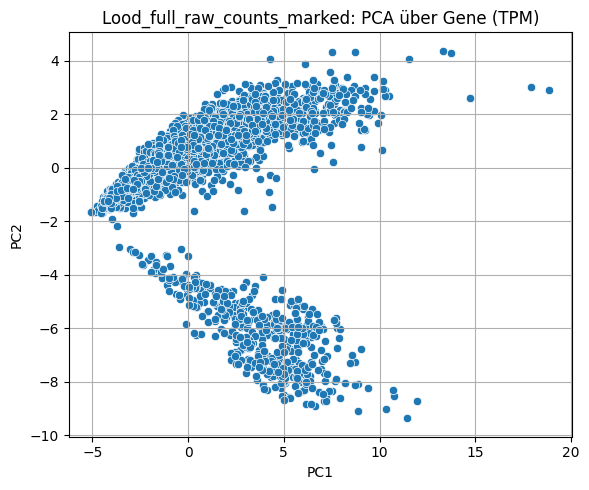

Erzeuge Heatmap für Lood_full_raw_counts_marked...


interactive(children=(IntSlider(value=20, continuous_update=False, description='Top % Gene:', layout=Layout(wi…

Erzeuge PCA für Sprenger_VC_WT_VP882_delta_cpdS_full_raw_counts_marked...


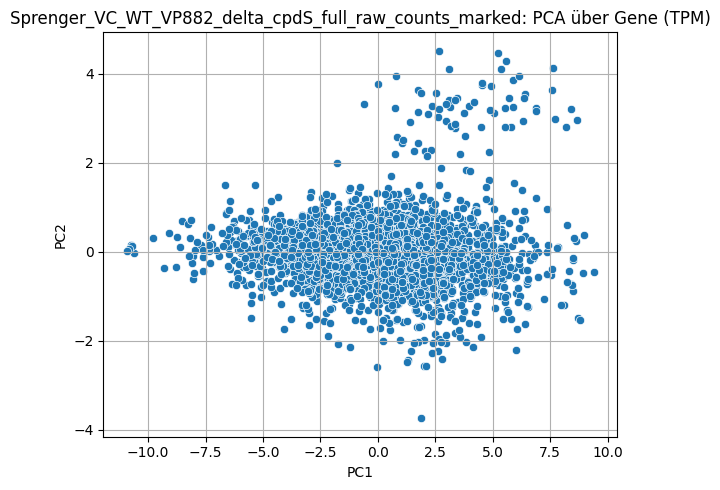

Erzeuge Heatmap für Sprenger_VC_WT_VP882_delta_cpdS_full_raw_counts_marked...


interactive(children=(IntSlider(value=20, continuous_update=False, description='Top % Gene:', layout=Layout(wi…

Erzeuge PCA für Yang_full_raw_counts_marked...


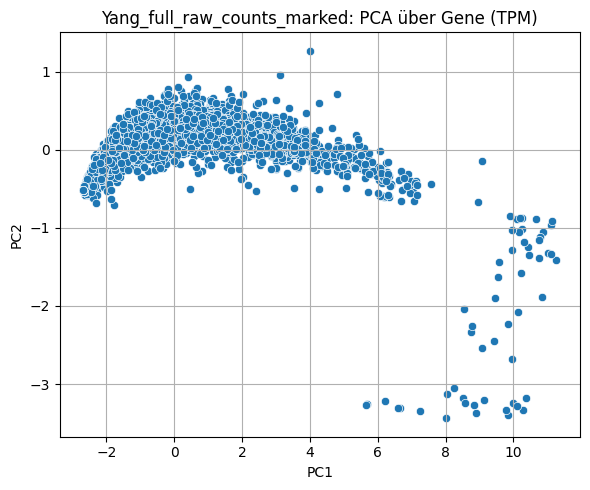

Erzeuge Heatmap für Yang_full_raw_counts_marked...


interactive(children=(IntSlider(value=20, continuous_update=False, description='Top % Gene:', layout=Layout(wi…

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets
from IPython.display import display

# === Pfade zu den TPM-normalisierten Datensätzen ===
path_normalized = "../data/datasets_normalized"
files = [f for f in os.listdir(path_normalized) if f.endswith("_tpm.tsv")]

# === TPM-Daten laden ===
def load_tpm(path):
    df = pd.read_csv(path, sep="\t")
    df = df.set_index("Geneid")
    
    # Nur numerische Spalten behalten UND die letzten drei spezifisch ausschließen
    unwanted_cols = {"relative changes", "negligible changes", "Outlier"}
    df = df[[col for col in df.columns if col not in unwanted_cols and pd.api.types.is_numeric_dtype(df[col])]]
    
    return df


datasets = {}
for file in files:
    dataset_name = file.replace("_tpm.tsv", "")
    print(f"Lade TPM-Daten für {dataset_name}...")
    datasets[dataset_name] = load_tpm(os.path.join(path_normalized, file))

# === Heatmap-Funktion ===
def interactive_heatmap(tpm_df, title, method="sum"):
    # TPM-Werte log2-transformieren
    tpm_log = np.log2(tpm_df + 1)

    # Scoring-Funktion
    if method == "sum":
        gene_scores = tpm_log.sum(axis=1)
    elif method == "variance":
        gene_scores = tpm_log.var(axis=1)
    else:
        raise ValueError("Methode muss 'sum' oder 'variance' sein.")

    total_genes = len(gene_scores)

    # Slider definieren
    slider = widgets.IntSlider(
        value=20,
        min=1,
        max=100,
        step=1,
        description='Top % Gene:',
        continuous_update=False,
        layout=widgets.Layout(width='400px')
    )

    # Callback-Funktion
    def update_heatmap(top_percent):
        top_n = max(1, int((top_percent / 100) * total_genes))
        top_genes = gene_scores.sort_values(ascending=False).head(top_n).index
        data = tpm_log.loc[top_genes]

        plt.figure(figsize=(10, 10)) 
        sns.heatmap(data, cmap="coolwarm", vmin=0, vmax=10, center=5,
                    yticklabels=False, xticklabels=True, cbar_kws={'label': 'Log2(TPM + 1)'})
        plt.title(f"{title} – Top {top_percent}% Gene")
        plt.xlabel("Samples")
        plt.ylabel("Top variable Genes")
        plt.tight_layout()
        plt.show()

    widgets.interact(update_heatmap, top_percent=slider)

# === PCA-Plot Funktion ===
def plot_pca_genes(tpm_df, title):
    data = np.log2(tpm_df + 1)
    scaler = StandardScaler()
    scaled = scaler.fit_transform(data)
    
    pca = PCA(n_components=2)
    components = pca.fit_transform(scaled)

    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=components[:, 0], y=components[:, 1])
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === Visualisierung aller geladenen Datensätze ===
for name, df in datasets.items():
    print(f"Erzeuge PCA für {name}...")
    plot_pca_genes(df, f"{name}: PCA über Gene (TPM)")

    print(f"Erzeuge Heatmap für {name}...")
    interactive_heatmap(df, f"{name}: Log2-TPM Heatmap")
